# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


from random import randint
from itertools import groupby

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here

df = []

def dice_simulator():
    
    for x in range(10):
        df.append(random.randint(1,6))
    throws = pd.DataFrame(df)
    return throws   

    
    
    
print(dice_simulator())  
print(df)

   0
0  1
1  2
2  2
3  2
4  4
5  2
6  6
7  1
8  4
9  5
[1, 2, 2, 2, 4, 2, 6, 1, 4, 5]


#### 2.- Plot the results sorted by value.

None


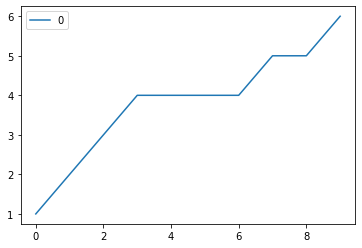

In [4]:
# your code here


def dice_simulator():
    df = []
    for x in range(10):
        df.append(random.randint(1,6))
    df_sorted = sorted(df)
    df_sorted = pd.DataFrame(df_sorted, index=None)
    df_sorted.plot()
        

    
    
    
print(dice_simulator())


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

None


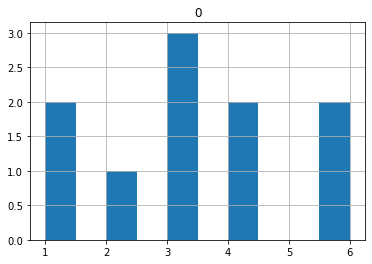

In [5]:
# your code here

def dice_simulator():
    df = []
    for x in range(10):
        df.append(random.randint(1,6))
    df_sorted = sorted(df)
    df_sorted = pd.DataFrame(df_sorted, index=None)
    df_sorted.hist()
        

    
    
    
print(dice_simulator())

In [5]:
"""
your comments here:

The frequency distribution it's just the number of times we get each number during the experiment, while on the fisrt graph
its just showing each value, it doesn't count nothing, it just shows the number we get on each attempt.
"""

"\nyour comments here:\n\nThe frequency distribution it's just the number of times we get each number during the experiment, while on the fisrt graph\nits just showing each value, it doesn't count nothing, it just shows the number we get on each attempt.\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
#mean

a = pd.DataFrame(df)

def mean_calculator(lst):
    for x in lst:
        operation = sum(lst)/len(lst)
    print('Mean is:',operation)
    
a.apply(mean_calculator)


Mean is: 2.9


0    None
dtype: object

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

counter = {value: len(list(freq)) for value,
           freq in groupby(sorted(df))}
print(counter)

count = 0
sumup = 0

for key in counter:
    count += 1
    sumup += counter[key]
print(sumup/count)

#mean(counter[k] for k in counter)
#def mean(lst):
    #a = len(lst)
    #b = sum(lst)
    #return b / a
#This ones above didnt work 

{1: 2, 2: 4, 4: 2, 5: 1, 6: 1}
2.0


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [27]:
# your code here
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0,
            s[n//2])[n % 2] if n else None
    

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [28]:
# your code here
def quartile_1(x):
    return sorted(x)[int(len(x) * 0.25)]

def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0,
            s[n//2])[n % 2] if n else None

def quartile_2(x):
    return sorted(x)[int(len(x) * 0.75)]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [57]:
# your code here
rolls = pd.read_csv('../data/roll_the_dice_hundred.csv')
rolls.sort_values(by=['value'], ascending= False)

,Unnamed: 0,roll,value
99,99,99,6
36,36,36,6
23,23,23,6
24,24,24,6
90,90,90,6
...,...,...,...
89,89,89,1
47,47,47,1
73,73,73,1
56,56,56,1


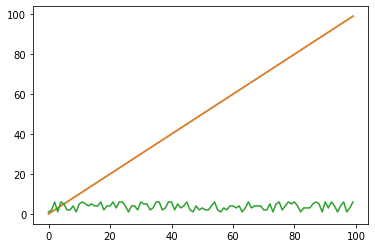

In [58]:
plt.plot(rolls)

In [ ]:
"""
your comments here

here you cant see a lot from the data frame its hard to 
obtain info about the rolls, and the plotting you can 
guess that the rolls tend to be even on every number but 
100 rolls are not enough to let them be even.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [32]:
# your code here

rolls.apply(median)

Unnamed: 0    49.5
roll          49.5
value          4.0
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [45]:
# your code here


def freq(df):
    d = {}
    for x in df:
        if d.get(x):
            d[x] += 1
        else:
            d[x] = 1
    return d

frequencies = rolls.apply(freq)
frequencies



Unnamed: 0    {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...
roll          {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...
value                {1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}
dtype: object

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

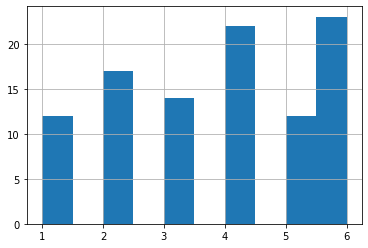

In [50]:
# your code here

rolls['value'].hist();

In [ ]:
"""
your comments here

Well there is not a lot of difference on the amount of times
each number appears, they tend to appear almost the same, 
almost.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [54]:
# your code here
roll_thou = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_thou.sort_values(by=['value'])

,Unnamed: 0,roll,value
564,564,564,1
922,922,922,1
560,560,560,1
213,213,213,1
214,214,214,1
...,...,...,...
855,855,855,6
360,360,360,6
857,857,857,6
388,388,388,6


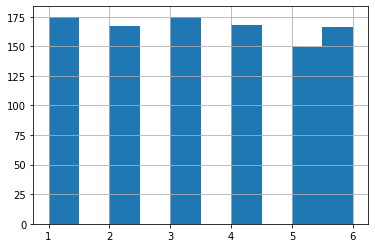

In [60]:
roll_thou['value'].hist();

In [ ]:
"""
your comments here

I guess that if with a 1000 it has to be closer to the median 
and the numbers must appear almost the same number of times
at least it has to be more even than with a 100.

Afer plotting it its clear that they all appear almost the 
same in the dataset.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [64]:
# your code here
population = pd.read_csv('../data/ages_population.csv')
population.apply(freq)

observation    {68.0: 3, 12.0: 11, 45.0: 29, 38.0: 30, 49.0: ...
dtype: object

In [65]:
population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


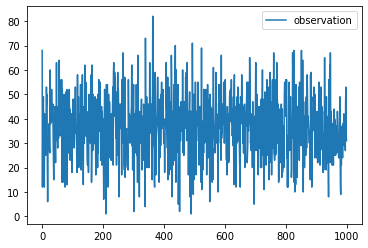

In [68]:
population.plot()

#The mean would be around 35/45 y/o, 
#std would be around 25/55, ten points around the mean
#I guess just looking at the plot

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [78]:
# your code here
pop = population['observation'].tolist()

for i in lst:
    mean = sum(pop) / len(pop)
print(f'Mean age on the dataset',mean)




Mean age on the dataset 36.56


In [ ]:
"""
your comments here

I wasn't that far from reality on the avg. age.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""